Alfaifi, Ammr
201855360

# Objective
<font size="9"> To find the Planck constants as well as Rydberg constant by using spectrometer with hydrogen tube </font>


In [1]:
import scipy as sc
import numpy as np
import sympy as sp 
import astropy.units as u 
import astropy.constants as co
import matplotlib.pyplot as plt 
import tabulate
import matplotlib
from IPython.display import Markdown, display_latex, HTML, Latex
# %matplotlib inline

# Theory
## the wavelength equation from the grading is giving in terms of angle 

In [2]:
lamda, n, R, d, m, theta, h, c, dE = sp.symbols(r"\lambda, n, R_\infty, d, m, \theta, h, c, \Delta{E}")
lamda_grading = sp.Eq(lamda, m * d * sp.sin(theta))
lamda_grading

Eq(\lambda, d*m*sin(\theta))

## The wavelength equation for the balmer series is giving in terms of principal quantum number $'n'$

In [3]:

lamda_n = sp.Eq(1/lamda, R * (1/4 - 1/n**2))
lamda_n

Eq(1/\lambda, R_\infty*(0.25 - 1/n**2))

## The Planck constant equation for the balmer series is giving in terms of principal quantum number $'n'$ and $'\lambda'$

In [4]:
planck = sp.Eq(h, dE * lamda/c)
planck

Eq(h, \Delta{E}*\lambda/c)

# Data

In [5]:
# setting the data
data = {"m":1, "d":(3.3867*u.um).si.value, "Angle":[(7.105+7.168)/2, (7.565+7.555)/2, (8.436+8.432)/2, (11.438+11.420)/2]*u.degree, "n":[6.0, 5.0, 4.0, 3.0]}


In [6]:
from IPython.display import HTML, display
import tabulate
headers = ["Color", "Angle avg", "n"]
table = [
        ["Weak violet", data["Angle"][0], data["n"][0]],
        ["Violet", data["Angle"][1], data["n"][1]],
        ["Blue-Green", data["Angle"][2], data["n"][2]],
        ["Red", data["Angle"][3], data["n"][3]]
        ]

# HTML(tabulate.tabulate(table, tablefmt='html'))
# Latex(tabulate.tabulate(table, headers, tablefmt='latex'))
print(tabulate.tabulate(table, headers, tablefmt='grid'))

+-------------+------------------------+-----+
| Color       | Angle avg              |   n |
+=============+========================+=====+
| Weak violet | 7.1365 deg             |   6 |
+-------------+------------------------+-----+
| Violet      | 7.5600000000000005 deg |   5 |
+-------------+------------------------+-----+
| Blue-Green  | 8.434000000000001 deg  |   4 |
+-------------+------------------------+-----+
| Red         | 11.429 deg             |   3 |
+-------------+------------------------+-----+


# Calculations
## Finding the Rydberg constant

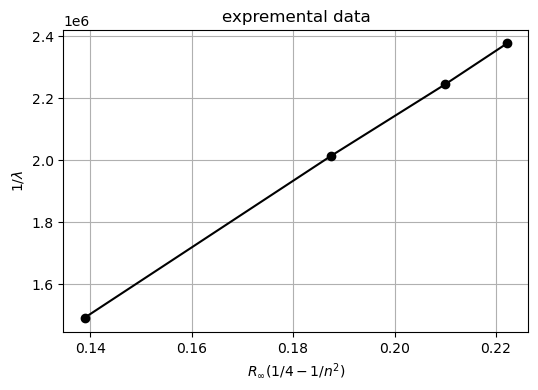

In [7]:
y = []
x = []
for i in data["n"]:
    x.append(float(lamda_n.rhs.subs({n:i, R:1})))
    

for i in data["Angle"]:
    y.append(float(1/lamda_grading.rhs.subs({m:1, d:data["d"], theta:i.value * sp.pi/180})))

slope, b = np.polyfit(x, y, 1)


(fig, ax) = plt.subplots(dpi=100, figsize=(6,4))
ax.plot(x, y, 'k-o')
ax.set(xlabel="$R_\infty(1/4-1/n^2)$", ylabel="$1/\\lambda$", title='expremental data')
ax.grid()
fig.show()

In [8]:
Markdown(f"""
The best slope is {slope * 1/u.m}

The percentage difference is {np.abs((slope-co.Ryd.value)/co.Ryd.value)*100}
""")


The best slope is 10624479.863555742 1 / m

The percentage difference is 3.182615707655924


## Finding the Planck constant value

In [9]:
E2 = (-13.61*u.eV/4).si
h_sum = 0
for i, j in zip(data["n"], y):
    h_sum += (-(13.61*u.eV/i**2).si.value - E2.value)/co.c.value * 1/j

h_sum /= 4

Markdown(f"""
The avergae value of placnk constant is {h_sum * u.J*u.s}

The percentage difference is {np.abs((h_sum - co.h.value) / co.h.value)*100}
""")


The avergae value of placnk constant is 6.790072417796182e-34 J s

The percentage difference is 2.4751061199704028


# Conclusion
In this lab we used spectrometer to find the actomic constants: Planck $h$ and Rydberg $R_\infty$. 
We found the planck valuse is about 6.790072417796182e-34 J s.
With error difference percentage about 2.5%.

We found the rydberg value us about 10624479.863555742 1 / m.
With error difference percentage about 3.2%.



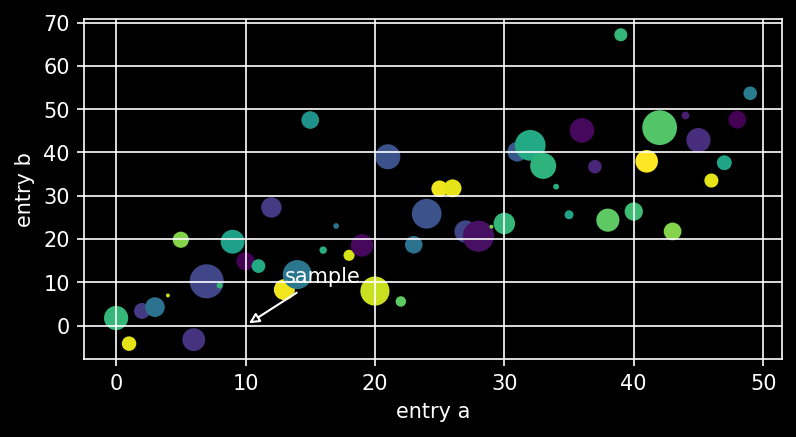

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [15]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

with plt.style.context(['dark_background']):
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['figure.figsize'] = (6,3) 
    plt.scatter('a', 'b', c='c', s='d', data=data)
    plt.xlabel('entry a')
    plt.ylabel('entry b')
    plt.grid()
    # plt.clf()
    plt.annotate("sample", xy=(10, 0), xytext=(13, 10), arrowprops=dict(facecolor="black", arrowstyle="-|>"))
    # plt.close()
    # fig.savefig("pieCharts.png")
    # from IPython.display import Image
    # Image("pieCharts.png")



plt.show()
print(plt.style.available)